# Embeddable Slider for CV function visualisation

Everything you need to know to get an embeddable widget with sliders working inside an ipython notebook in two steps.

## First step: Let's get ipython widgets working

Following [this post](https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/), starting by the last example. First, create the functions we want to plot and embed:

In [14]:
%matplotlib inline
from sklearn.neighbors import KernelDensity
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.concatenate([np.random.normal(0, 1, 1000),
                    np.random.normal(1.5, 0.2, 300)])

def plot_KDE_estimate(kernel, b):
    bandwidth = 10 ** (0.1 * b)
    x_grid = np.linspace(-3, 3, 1000)
    kde = KernelDensity(bandwidth=bandwidth,
                        kernel=kernel)
    kde.fit(x[:, None])
    pdf = np.exp(kde.score_samples(x_grid[:, None]))
    
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.hist(x, 60, histtype='stepfilled', normed=True,
            edgecolor='none', facecolor='#CCCCFF')
    ax.plot(x_grid, pdf, '-k', lw=2, alpha=0.5)
    ax.text(-2.8, 0.48,
            "kernel={0}\nbandwidth={1:.2f}".format(kernel, bandwidth),
            fontsize=14, color='gray')
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 0.601)
    
#    return fig <- removed to avoid double plot

Now some `ipywidgets` magic:

In [12]:
from ipywidgets import StaticInteract, RangeWidget
StaticInteract(plot_KDE_estimate,
               kernel=RadioWidget(['gaussian', 'tophat', 'exponential'],
                                  delimiter="<br>"),
               b=RangeWidget(-14, 8, 2))

ImportError: cannot import name 'StaticInteract'

[disappointed.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6by0Ff3e3ceMmWHw-MwpDv6Ip8oJt0nGGFUq0l6J_LsSakzpExA)

## First.5 step: for real this time

Let's try this again, now updating the above with information from [the documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

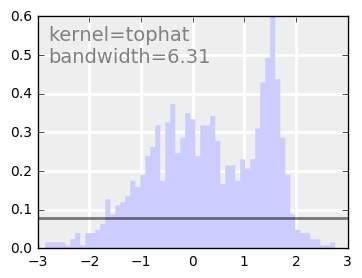

In [15]:
from ipywidgets import interact
interact(plot_KDE_estimate,
               kernel=('gaussian', 'tophat', 'exponential'),
               b=(-14, 8, 2))

[yay.png](http://images.digopaul.com/wp-content/uploads/related_images/2015/09/08/ecstatic_2.jpg)

Now that we've got this working, let's get to the interesting stuff.

## Second step: Let's get to the interesting stuff

Now we add the computer vision stuff. I'll build a `plot_CV_pipeline` function with flags to stop the pipeline at any particular time for visual inspection and parameter tuning without blind guessing. This will result in `plot_CV_pipeline` having about 8000 parameters. Oh well, that's life `¯\_(ツ)_/¯`

In [61]:
from matplotlib import image as mpimg
import cv2

original = mpimg.imread('sample.jpg')

def CV_pipeline(view):
    '''This returns the image we should plot'''
#    view = params # unpack params
    global original

    if view is "original":
        # easy peasy, lemon squeezy
        return original
    
    grey = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

    if view is "greyscale":
        # so far we haven't done anything real.
        return grey

def plot_CV_pipeline(view):
    '''This plots the image we should return'''
    img = CV_pipeline(view=view)
    cv2.imshow('image',img)
#    ax.set_axis_off() # get rid of the axes so people forget x grows downwards
    
interact(plot_CV_pipeline,
               view = ("original", "greyscale"))

error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/highgui/src/window.cpp:281: error: (-215) size.width>0 && size.height>0 in function imshow


<function __main__.plot_CV_pipeline>